In [1]:
%load_ext autoreload

# 引入必要的库

In [2]:
%autoreload
import sys,os
import numpy as np
import matplotlib.pyplot as plt
from tianmoucv.isp import fourdirection2xy,poisson_blend
import torch
from tianmoucv.data import TianmoucDataReader


extra_data = ['/data/tianmoucData/tianmoucReconDataset_merged/test/normal']

import torch.nn.functional as F
import cv2


speedUpRate = 1
dataset = TianmoucDataReader(extra_data,MAXLEN=500*speedUpRate,
                             ifSaveFileDict = False,
                             speedUpRate=speedUpRate)

dataLoader = torch.utils.data.DataLoader(dataset, batch_size=1,\
                                          num_workers=4, pin_memory=False, drop_last = False)

count = 0
torchmean = 0

import TianmouCV 0.1, via Y. Lin, T. Wang  pre release version
['/data/tianmoucData/tianmoucReconDataset_merged/test/normal/test_driving20/rod/rod_compact.tmdat']
['/data/tianmoucData/tianmoucReconDataset_merged/test/normal/test_driving20/cone/cone_compact.tmdat']
['/data/tianmoucData/tianmoucReconDataset_merged/test/normal/test_man_play_ball3/rod/rod_compact.tmdat']
['/data/tianmoucData/tianmoucReconDataset_merged/test/normal/test_man_play_ball3/cone/cone_compact.tmdat']
['/data/tianmoucData/tianmoucReconDataset_merged/test/normal/outdoor_cross_13/rod/tianmouc_raw_data_429587756.tmdat']
['/data/tianmoucData/tianmoucReconDataset_merged/test/normal/outdoor_cross_13/cone/tianmouc_raw_data_429586580.tmdat']
['/data/tianmoucData/tianmoucReconDataset_merged/test/normal/indoor_phone_1/rod/tianmouc_raw_data_181969861.tmdat']
['/data/tianmoucData/tianmoucReconDataset_merged/test/normal/indoor_phone_1/cone/tianmouc_raw_data_181966202.tmdat']
['/data/tianmoucData/tianmoucReconDataset_merged/test

# 融合图像

['/data/tianmoucData/tianmoucReconDataset_merged/test/normal/test_exam_fan4/rod/rod_compact.tmdat']
['/data/tianmoucData/tianmoucReconDataset_merged/test/normal/test_exam_fan4/cone/cone_compact.tmdat']
labelFileName: /data/tianmoucData/tianmoucReconDataset_merged/test/normal/test_exam_fan4/label.csv doesnot have status label
test_exam_fan4@/data/tianmoucData/tianmoucReconDataset_merged/test/normal origin length: 30
test_exam_fan4@/data/tianmoucData/tianmoucReconDataset_merged/test/normal ---legal sample num: 30


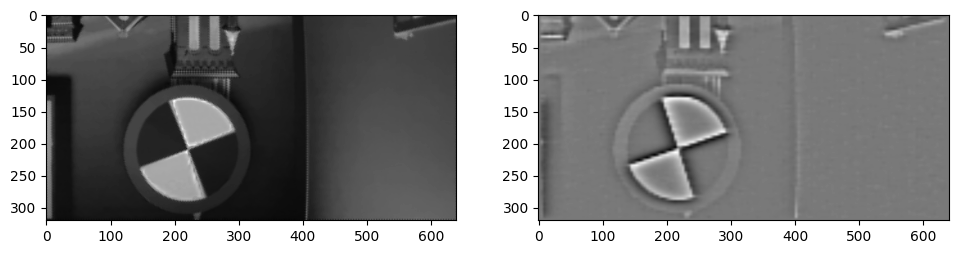

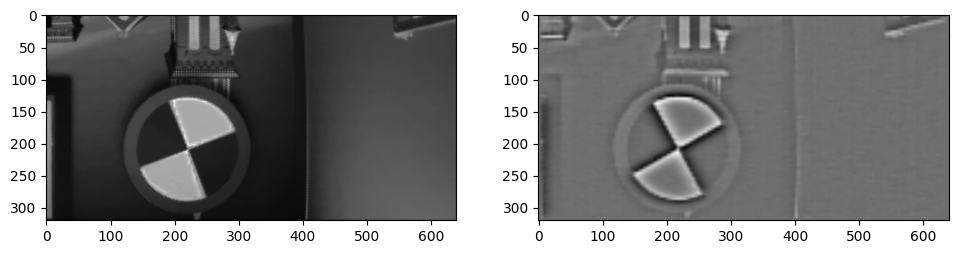

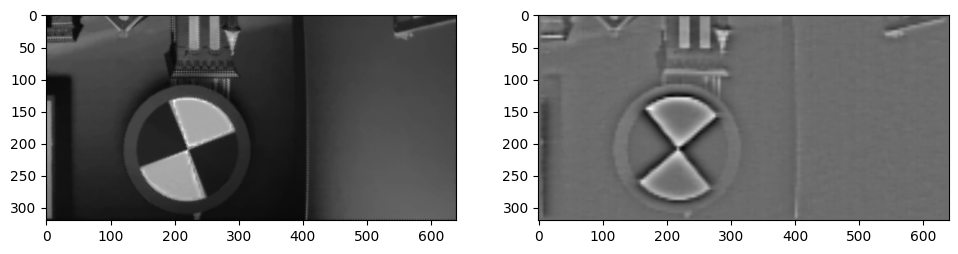

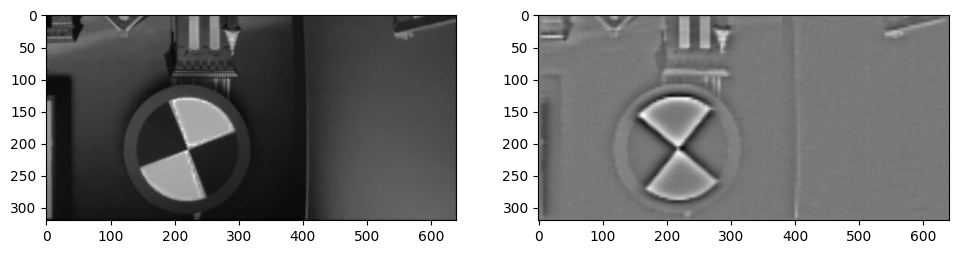

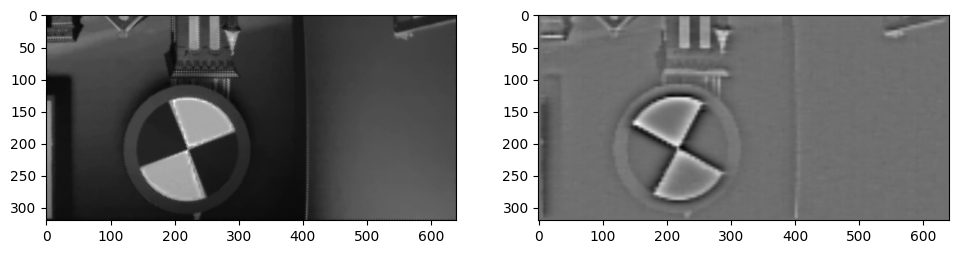

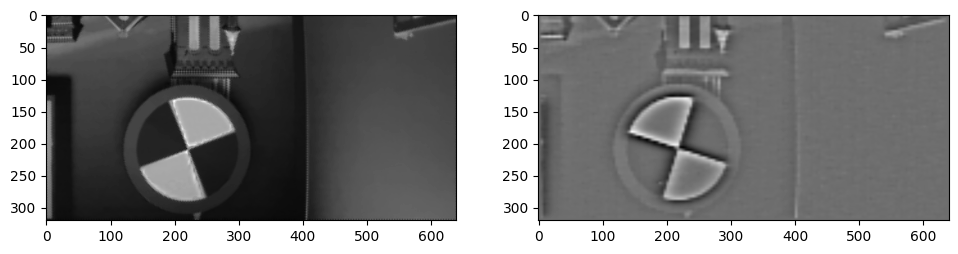

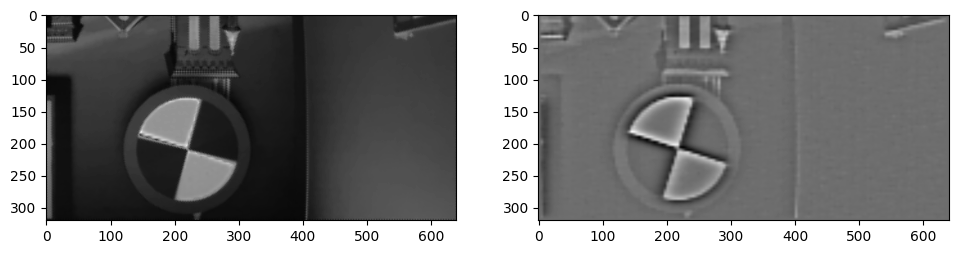

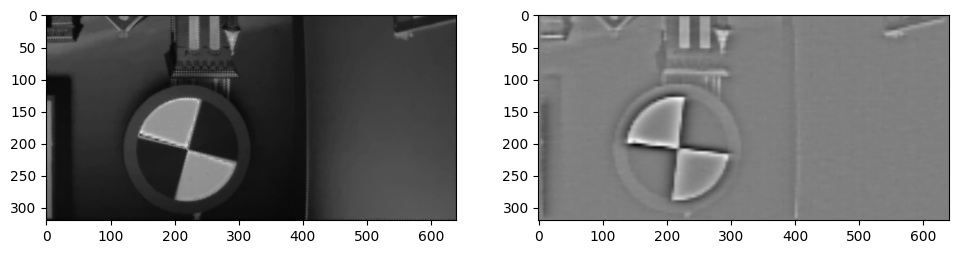

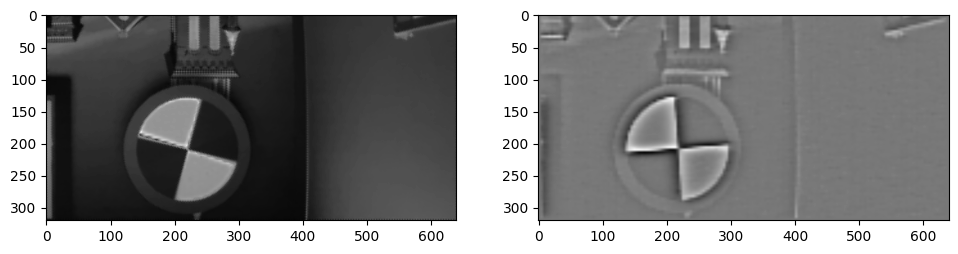

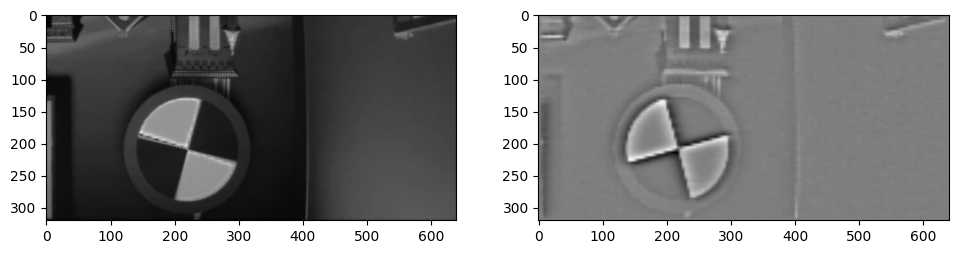

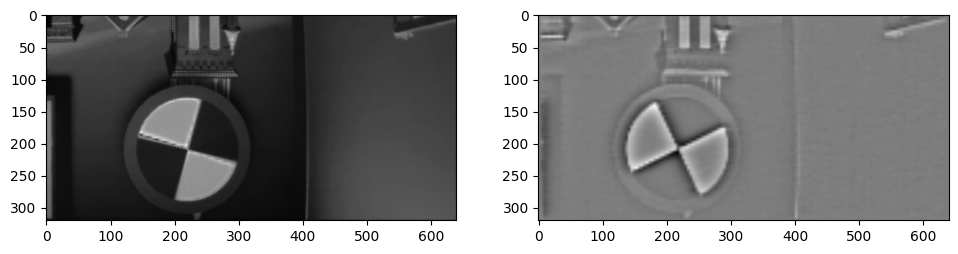

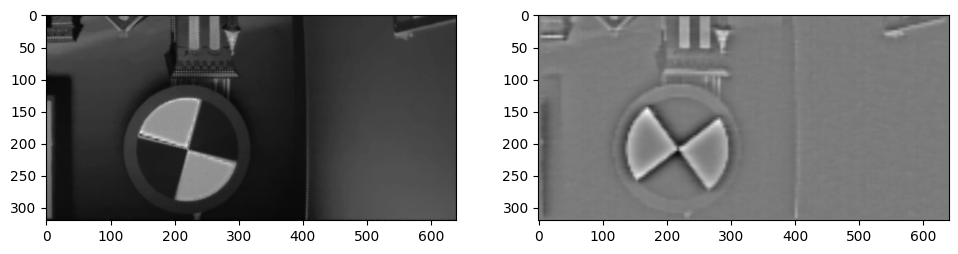

In [3]:
%autoreload
import torch.nn as nn
import math
from tianmoucv.reconstructor.integration import grayReconstructor

MSE_LossFn = nn.MSELoss()
speedUpRate = 1

psnrcount =0
count = 0

key_list = ["test_exam_fan4"]

for key in key_list:
    dataset = TianmoucDataReader(extra_data,MAXLEN=500*speedUpRate,ifSaveFileDict = False,
                                 matchkey=key,speedUpRate=speedUpRate)
    dataLoader = torch.utils.data.DataLoader(dataset, batch_size=1,\
                                          num_workers=4, pin_memory=False, drop_last = False)

    PSNR = 0
    img_list = []
    for index,sample in enumerate(dataLoader,0):
        if index<0:
            continue
        if index<= 1:
            psnrcount += 1
            F0 = sample['F0_HDR'][0,...]
            F1 = sample['F1_HDR'][0,...]
            gray1 = torch.mean(F1,dim=-1)
            gray0 = torch.mean(F0,dim=-1)

            for t in range(sample['rawDiff'].size(2)):

                tsdiff = sample['rawDiff'][0,...]/255.0           
                SD = tsdiff[1:,t,...].permute(1,2,0)
                Ix,Iy= fourdirection2xy(SD)
                gray = poisson_blend(-Ix,-Iy,iteration=20)
                gray = F.interpolate(torch.Tensor(gray).unsqueeze(0).unsqueeze(0), size=(320,640), mode='bilinear').squeeze(0).squeeze(0)
        
                if t%5==0:
                    plt.figure(figsize=(18,6))
                    plt.subplot(1,3,1)  
                    plt.imshow(gray0,cmap='gray')
                    plt.subplot(1,3,2)  
                    plt.imshow(gray,cmap='gray')
                    plt.show()
        else:
            break